In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Typical.jpg')
image

array([[[208, 170, 170],
        [186, 150, 150],
        [181, 152, 148],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 254, 253]],

       [[174, 140, 140],
        [153, 122, 121],
        [143, 116, 112],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [254, 255, 253]],

       [[126,  98,  97],
        [155, 130, 128],
        [161, 141, 136],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [252, 254, 254]],

       ...,

       [[ 70,  84,  72],
        [ 71,  85,  73],
        [ 55,  69,  57],
        ...,
        [ 86,  85,  94],
        [ 95,  94, 103],
        [ 95,  93,  99]],

       [[ 45,  55,  49],
        [ 36,  46,  40],
        [ 48,  58,  52],
        ...,
        [ 81,  83,  93],
        [ 84,  83,  93],
        [ 88,  87,  96]],

       [[ 40,  46,  45],
        [ 25,  31,  30],
        [ 27,  35,  34],
        ...,
        [ 79,  81,  92],
        [ 80,  81,  91],
        [ 86,  85,  95]]

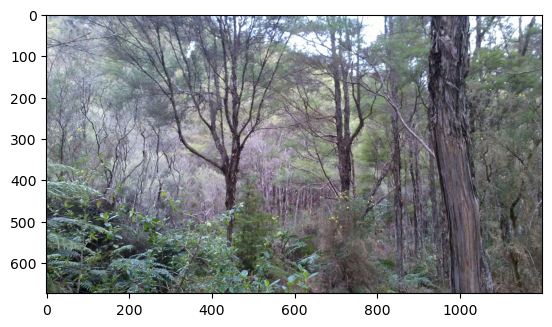

In [5]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


### Contrast Enhancement: You should implement histogram equalization. You can perform this on the grayscale version of the image or on the V-channel of the HSV color space to enhance the overall brightness and contrast without affecting the hue.

In [10]:
gray_image = cv2.imread('Typical.jpg',cv2.IMREAD_GRAYSCALE)
gray_image


array([[174, 154, 154, ..., 254, 254, 254],
       [144, 125, 118, ..., 254, 254, 254],
       [101, 132, 142, ..., 254, 254, 254],
       ...,
       [ 79,  80,  64, ...,  88,  97,  95],
       [ 52,  43,  55, ...,  86,  86,  90],
       [ 45,  30,  34, ...,  84,  84,  88]], dtype=uint8)

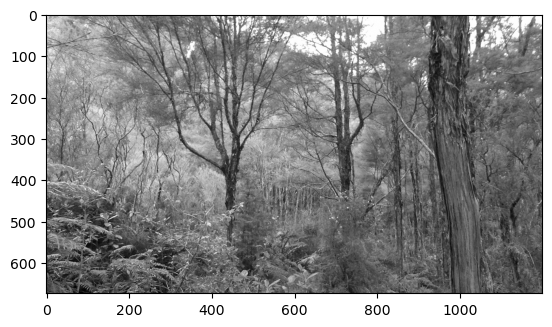

In [11]:
plt.imshow(gray_image,cmap = 'gray')
plt.show()

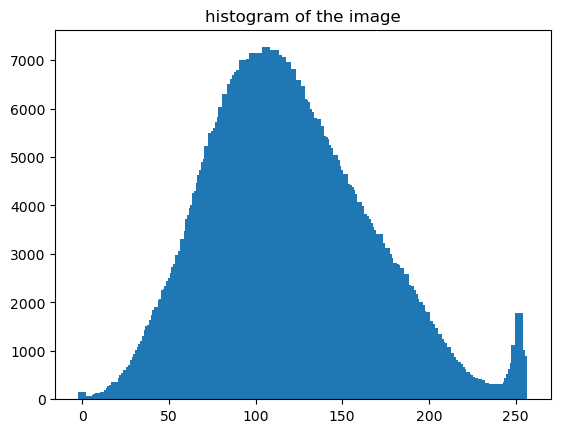

In [12]:
hist = cv2.calcHist([image],[0],None,[256],[0,255])
plot_hist = np.array([c for c in range(hist.shape[0])])
plt.bar(plot_hist,hist[:,0],width = 5)
plt.title('histogram of the image')
plt.show()

### Saturation Enhancement: You should increase the saturation of the image. This can be done by converting the image to the HSV (Hue, Saturation, Value) color space, multiplying the Saturation channel by a factor (e.g., 1.5), and then converting the image back to RGB. You should handle potential value clipping (values exceeding 255) to avoid unwanted artifacts.

In [24]:
color_image = cv2.imread('Typical.jpg',cv2.IMREAD_COLOR)
color_image

array([[[208, 170, 170],
        [186, 150, 150],
        [181, 152, 148],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 254, 253]],

       [[174, 140, 140],
        [153, 122, 121],
        [143, 116, 112],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [254, 255, 253]],

       [[126,  98,  97],
        [155, 130, 128],
        [161, 141, 136],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [252, 254, 254]],

       ...,

       [[ 70,  84,  72],
        [ 71,  85,  73],
        [ 55,  69,  57],
        ...,
        [ 86,  85,  94],
        [ 95,  94, 103],
        [ 95,  93,  99]],

       [[ 45,  55,  49],
        [ 36,  46,  40],
        [ 48,  58,  52],
        ...,
        [ 81,  83,  93],
        [ 84,  83,  93],
        [ 88,  87,  96]],

       [[ 40,  46,  45],
        [ 25,  31,  30],
        [ 27,  35,  34],
        ...,
        [ 79,  81,  92],
        [ 80,  81,  91],
        [ 86,  85,  95]]

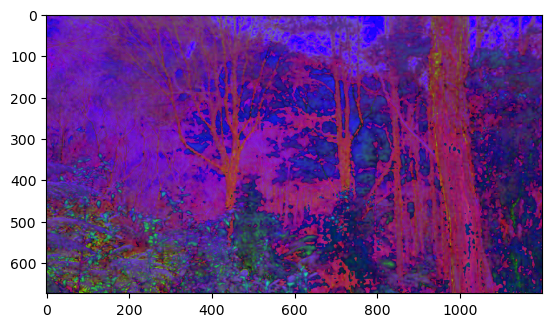

In [25]:
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.show()

In [26]:
h, s, v = cv2.split(hsv_image)
factor = 1.5
s = np.clip(s.astype(np.float32) * factor, 0, 255).astype(np.uint8)

In [27]:
hsv_boosted = cv2.merge((h, s, v))
rgb_boosted = cv2.cvtColor(hsv_boosted, cv2.COLOR_HSV2RGB)

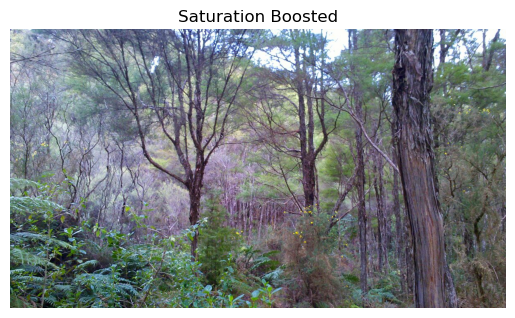

In [28]:
plt.imshow(rgb_boosted)
plt.title("Saturation Boosted")
plt.axis("off")
plt.show()